<a href="https://colab.research.google.com/github/PerdomoVergaraFernando/Investigaciones-de-operaciones-/blob/main/Inventario_de_varios_art%C3%ADculos_con_limitaci%C3%B3n_de_almac%C3%A9n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modelo EOQ con Restricción de Almacén

In [22]:
# librerías
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import sympy as sp

##Función objetivo y visualización

In [23]:
# Función objetivo y visualización
def f(variables):
    """
    Función objetivo que representa el costo total del inventario.
    En el contexto EOQ, esta sería TCU(y1, y2, ..., yn)
    """
    x, y = variables
    # Ejemplo: función cuadrática (simplificada para visualización)
    return (x - 1)**2 + (y - 2)**2 + 3

In [24]:
# Generar datos para la visualización
x = np.linspace(-4, 2, 100)
y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x, y)
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))

##Grafica

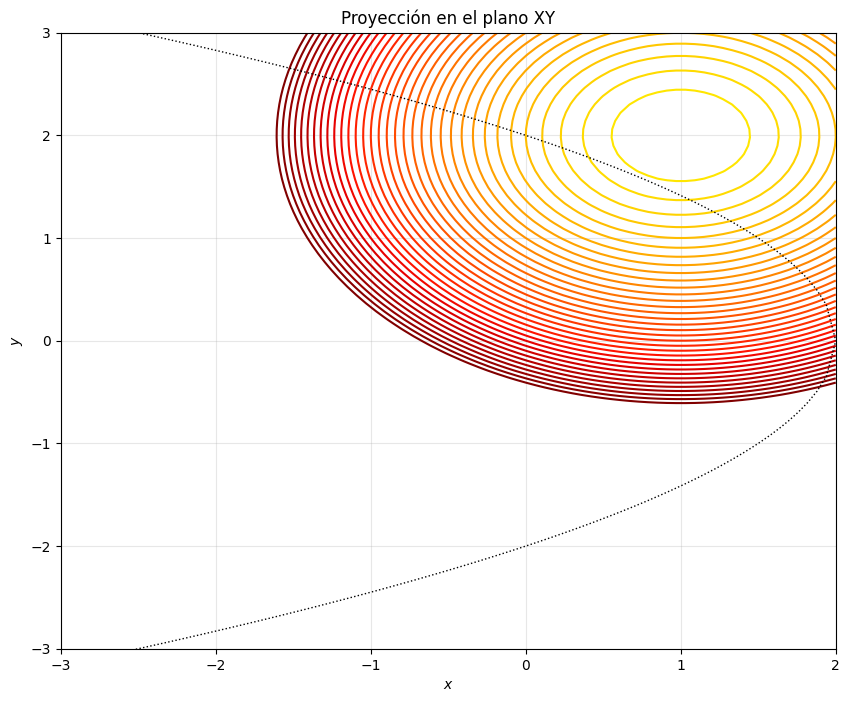

In [25]:
# Configurar la figura
plt.figure(figsize=(10,8))
plt.contour(X, Y, Z, np.arange(-10,10, 0.2), cmap='jet')
plt.plot(x, np.sqrt(4-2.0*x), 'k:', linewidth=1)
plt.plot(x, -np.sqrt(4-2.0*x), 'k:', linewidth=1)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title("Proyección en el plano XY")
plt.axis([-3.0,2.0,-3.0,3.0])
plt.grid(True, alpha=0.3)
plt.show()

Definimos las restricciones y optimización

In [26]:
#Definición de restricciones y optimización
# Restricción: x + 0.5*y^2 = 2 (forma de ecuación)
cons = ({'type': 'eq',
         'fun' : lambda x: np.array([x[0] + 0.5*x[1]**2-2.0])})

# Límites para las variables
bnds = ((-4.0, 4.0), (-4.0, 4.0))

# Punto inicial
x0 = [0, 2.5]

print("=" * 60)
print("OPTIMIZACIÓN SIN RESTRICCIONES")
print("=" * 60)
ux = opt.minimize(f, x0, constraints=None, bounds=bnds)
print(f"Punto óptimo: {ux.x}")
print(f"Valor mínimo de la función: {ux.fun}")
print(f"¿Convergión exitosa?: {ux.success}")
print()

print("=" * 60)
print("OPTIMIZACIÓN CON RESTRICCIONES")
print("=" * 60)
cx = opt.minimize(f, x0, bounds=bnds, constraints=cons)
print(f"Punto óptimo: {cx.x}")
print(f"Valor mínimo de la función: {cx.fun}")
print(f"¿Convergión exitosa?: {cx.success}")
print(f"Restricción evaluada en el óptimo: {cx.x[0] + 0.5*cx.x[1]**2 - 2.0}")

OPTIMIZACIÓN SIN RESTRICCIONES
Punto óptimo: [1. 2.]
Valor mínimo de la función: 3.0
¿Convergión exitosa?: True

OPTIMIZACIÓN CON RESTRICCIONES
Punto óptimo: [0.73967066 1.58765857]
Valor mínimo de la función: 3.2377968189620896
¿Convergión exitosa?: True
Restricción evaluada en el óptimo: 5.297545633276002e-07


 ## Gráficas

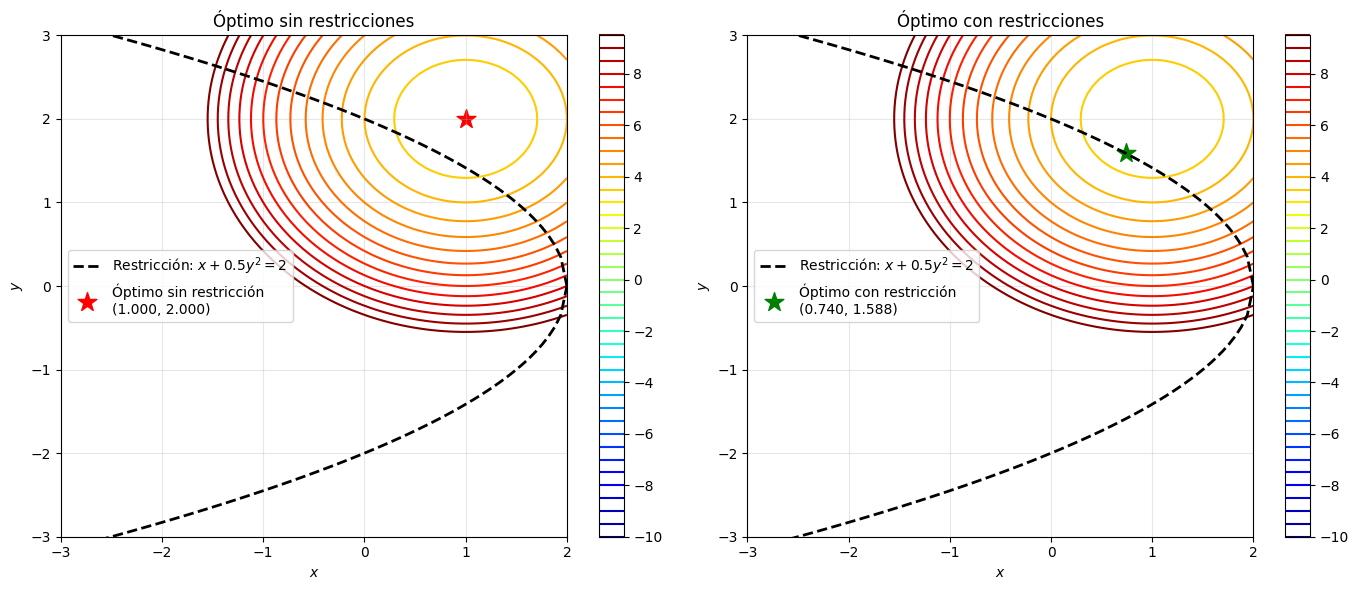

In [27]:
# Visualización de los resultados
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: Punto óptimo sin restricciones
ax1 = axes[0]
contour1 = ax1.contour(X, Y, Z, np.arange(-10,10, 0.5), cmap='jet')
ax1.plot(x, np.sqrt(4-2.0*x), 'k--', linewidth=2, label='Restricción: $x + 0.5y^2 = 2$')
ax1.plot(x, -np.sqrt(4-2.0*x), 'k--', linewidth=2)
ax1.scatter(ux.x[0], ux.x[1], color='red', s=200, marker='*',
           label=f'Óptimo sin restricción\n({ux.x[0]:.3f}, {ux.x[1]:.3f})')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_title("Óptimo sin restricciones")
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.axis([-3.0,2.0,-3.0,3.0])

#Grafica 2: Punto óptimo con restricciones
ax2 = axes[1]
contour2 = ax2.contour(X, Y, Z, np.arange(-10,10, 0.5), cmap='jet')
ax2.plot(x, np.sqrt(4-2.0*x), 'k--', linewidth=2, label='Restricción: $x + 0.5y^2 = 2$')
ax2.plot(x, -np.sqrt(4-2.0*x), 'k--', linewidth=2)
ax2.scatter(cx.x[0], cx.x[1], color='green', s=200, marker='*',
           label=f'Óptimo con restricción\n({cx.x[0]:.3f}, {cx.x[1]:.3f})')
ax2.set_xlabel('$x$')
ax2.set_ylabel('$y$')
ax2.set_title("Óptimo con restricciones")
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.axis([-3.0,2.0,-3.0,3.0])

plt.colorbar(contour1, ax=ax1)
plt.colorbar(contour2, ax=ax2)
plt.tight_layout()
plt.show()

## Análisis comparativo

In [28]:
#Análisis comparativo
print("=" * 60)
print("ANÁLISIS COMPARATIVO DE SOLUCIONES")
print("=" * 60)

print(f"Variable x: {ux.x[0]:.4f} (sin restricción) vs {cx.x[0]:.4f} (con restricción)")
print(f"Variable y: {ux.x[1]:.4f} (sin restricción) vs {cx.x[1]:.4f} (con restricción)")
print(f"Valor de la función: {ux.fun:.4f} (sin restricción) vs {cx.fun:.4f} (con restricción)")

print(f"\nVerificación de restricción:")
print(f"  En solución sin restricción: {ux.x[0]} + 0.5*({ux.x[1]})² - 2 = {ux.x[0] + 0.5*ux.x[1]**2 - 2:.6f}")
print(f"  En solución con restricción: {cx.x[0]} + 0.5*({cx.x[1]})² - 2 = {cx.x[0] + 0.5*cx.x[1]**2 - 2:.6f}")

print(f"\nDiferencia en el valor de la función: {abs(ux.fun - cx.fun):.6f}")
print(f"Porcentaje de cambio: {abs(ux.fun - cx.fun)/ux.fun*100:.2f}%")

ANÁLISIS COMPARATIVO DE SOLUCIONES
Variable x: 1.0000 (sin restricción) vs 0.7397 (con restricción)
Variable y: 2.0000 (sin restricción) vs 1.5877 (con restricción)
Valor de la función: 3.0000 (sin restricción) vs 3.2378 (con restricción)

Verificación de restricción:
  En solución sin restricción: 1.000000000697094 + 0.5*(1.9999999966102027)² - 2 = 1.000000
  En solución con restricción: 0.7396706589234271 + 0.5*(1.5876585721313863)² - 2 = 0.000001

Diferencia en el valor de la función: 0.237797
Porcentaje de cambio: 7.93%


 ## Aplicación al modelo EOQ específico

In [29]:
# Aplicación al modelo EOQ específico
def eoq_cost(y, D=1000, K=50, h=2):
    """
    Función de costo EOQ para un artículo
    TCU(y) = (K*D)/y + (h*y)/2
    """
    return (K*D)/y + (h*y)/2

# Ejemplo para 2 artículos con restricción de almacén
def eoq_multiple_cost(y1_y2):
    """
    Costo total para 2 artículos con restricción de espacio
    TCU(y1, y2) = (K1*D1)/y1 + (h1*y1)/2 + (K2*D2)/y2 + (h2*y2)/2
    """
    y1, y2 = y1_y2
    # Parámetros del artículo 1
    D1, K1, h1 = 1000, 50, 2
    # Parámetros del artículo 2
    D2, K2, h2 = 2000, 80, 1.5

    return (K1*D1)/y1 + (h1*y1)/2 + (K2*D2)/y2 + (h2*y2)/2

# Restricción de almacén: a1*y1 + a2*y2 ≤ A
def espacio_almacen(y1_y2):
    """
    Restricción de espacio en almacén
    a1*y1 + a2*y2 - A = 0 (forma de ecuación)
    """
    y1, y2 = y1_y2
    a1, a2, A = 0.5, 1.0, 800  # Áreas por unidad y área total
    return np.array([a1*y1 + a2*y2 - A])

# Resolver el problema EOQ con restricción
print("=" * 60)
print("MODELO EOQ CON RESTRICCIÓN DE ALMACÉN")
print("=" * 60)

# Punto inicial (valores EOQ sin restricción)
y1_0 = np.sqrt(2*50*1000/2)  # EOQ para artículo 1 sin restricción
y2_0 = np.sqrt(2*80*2000/1.5)  # EOQ para artículo 2 sin restricción
x0_eoq = [y1_0, y2_0]

print(f"Valores iniciales (EOQ sin restricción):")
print(f"  y1 = {y1_0:.2f}, y2 = {y2_0:.2f}")
print(f"  Espacio requerido: {0.5*y1_0 + 1.0*y2_0:.2f} m²")
print(f"  Espacio disponible: 800 m²")

# Restricción
cons_eoq = ({'type': 'eq', 'fun': espacio_almacen})

# Límites (cantidades positivas)
bnds_eoq = ((0, None), (0, None))

# Resolver
result_eoq = opt.minimize(eoq_multiple_cost, x0_eoq, bounds=bnds_eoq, constraints=cons_eoq)

print(f"\nSolución óptima con restricción:")
print(f"  y1 = {result_eoq.x[0]:.2f}, y2 = {result_eoq.x[1]:.2f}")
print(f"  Costo total: ${result_eoq.fun:.2f}")
print(f"  Espacio utilizado: {0.5*result_eoq.x[0] + 1.0*result_eoq.x[1]:.2f} m²")
print(f"  Verificación restricción: {0.5*result_eoq.x[0] + 1.0*result_eoq.x[1] - 800:.6f}")

MODELO EOQ CON RESTRICCIÓN DE ALMACÉN
Valores iniciales (EOQ sin restricción):
  y1 = 223.61, y2 = 461.88
  Espacio requerido: 573.68 m²
  Espacio disponible: 800 m²

Solución óptima con restricción:
  y1 = 249.91, y2 = 675.04
  Costo total: $1193.29
  Espacio utilizado: 800.00 m²
  Verificación restricción: 0.000000


## Visualización del problema EOQ

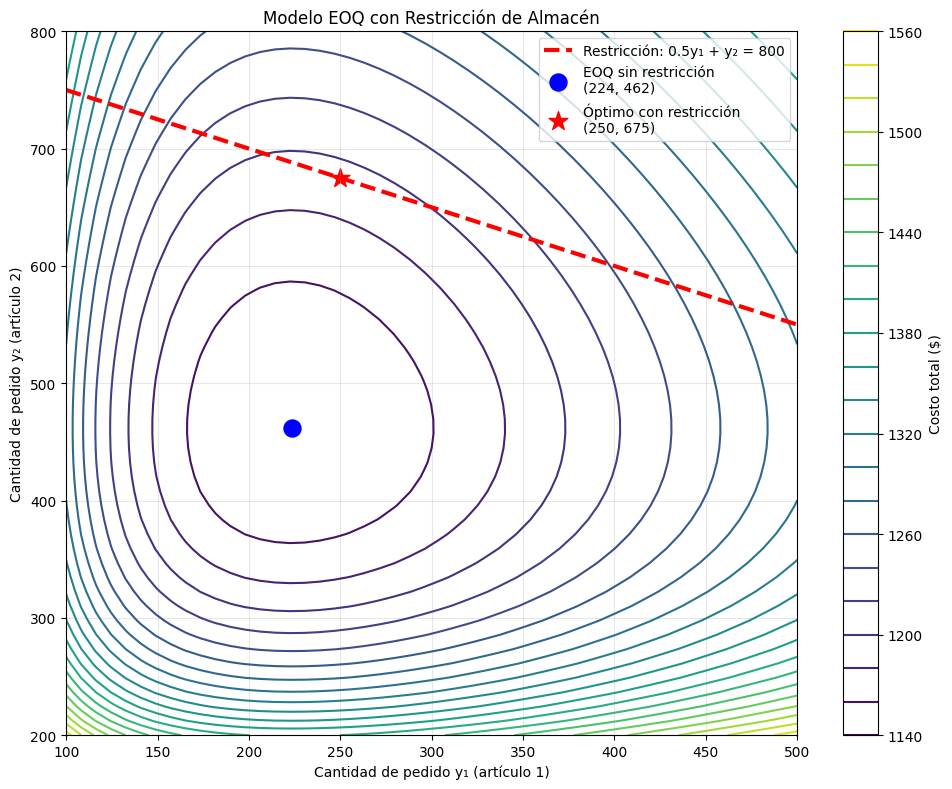

In [30]:
# Visualización del problema EOQ
# Generar datos para visualización
y1_range = np.linspace(100, 500, 50)
y2_range = np.linspace(200, 800, 50)
Y1, Y2 = np.meshgrid(y1_range, y2_range)

# Calcular costos
Z_eoq = np.zeros_like(Y1)
for i in range(len(y1_range)):
    for j in range(len(y2_range)):
        Z_eoq[j, i] = eoq_multiple_cost([Y1[j, i], Y2[j, i]])

# Crear gráfico
fig, ax = plt.subplots(figsize=(10, 8))
contour_eoq = ax.contour(Y1, Y2, Z_eoq, 20, cmap='viridis')

# Línea de restricción: 0.5*y1 + 1.0*y2 = 800
y2_constraint = (800 - 0.5*y1_range) / 1.0
ax.plot(y1_range, y2_constraint, 'r--', linewidth=3, label='Restricción: 0.5y₁ + y₂ = 800')

# Puntos importantes
ax.scatter(y1_0, y2_0, color='blue', s=150, marker='o',
          label=f'EOQ sin restricción\n({y1_0:.0f}, {y2_0:.0f})')
ax.scatter(result_eoq.x[0], result_eoq.x[1], color='red', s=200, marker='*',
          label=f'Óptimo con restricción\n({result_eoq.x[0]:.0f}, {result_eoq.x[1]:.0f})')

ax.set_xlabel('Cantidad de pedido y₁ (artículo 1)')
ax.set_ylabel('Cantidad de pedido y₂ (artículo 2)')
ax.set_title('Modelo EOQ con Restricción de Almacén')
ax.legend()
ax.grid(True, alpha=0.3)

plt.colorbar(contour_eoq, label='Costo total ($)')
plt.tight_layout()
plt.show()